<a href="https://colab.research.google.com/github/Deepikagh97/Telecom-Churn-Analysis/blob/main/DN_%7C_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Analysis**

In [2]:
# import all librariers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

### **Read and view data**

In [3]:
# Read the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Telecom Churn.csv")

Saving Telecom Churn.csv to Telecom Churn.csv


In [4]:
#Glimpse of Data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
print('The number of rows are',df.shape[0],'\n''The number of columns are',df.shape[1])

The number of rows are 3333 
The number of columns are 20


***Checking datatype of all***

In [7]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

There are 20 columns out of one column "Churn" which is the target variable is of Boolean type. There are 3 object type and 16 of numerical type.

***Checking information about the dataset***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

***Now, let us check the basic measures of descriptive statistics for the continuous variables***

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.00,NaN,NaN,NaN,101.06,39.82,1.00,74.00,101.00,127.00,243.00
Area code,3333.00,NaN,NaN,NaN,437.18,42.37,408.00,408.00,415.00,510.00,510.00
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.00,NaN,NaN,NaN,8.10,13.69,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.00,NaN,NaN,NaN,179.78,54.47,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.00,NaN,NaN,NaN,100.44,20.07,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.00,NaN,NaN,NaN,30.56,9.26,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.00,NaN,NaN,NaN,200.98,50.71,0.00,166.60,201.40,235.30,363.70


The average 'Number vmail messages' is 8.10, 'Total day minutes' is 179.78, 'Total day calls' is 100.44, 'Total day charge' is 30.56, 'Total eve minutes' is 200.98, 'Total eve calls' is 100.11, 'Total eve charge' is 17.08, Total night minutes' is 200.87, 'Total night calls' is 100.11, 'Total night charge' is 9.04, Total intl minutes' is 10.24, 'Total intl calls' is 4.48, 'Total intl charge' is 2.76, 'Customer service calls' is 1.56.

Avarage of Total day charge is more than total eve charge, total night charge, and total intl charge.

Around 50% of customers didn't used vmail messages.

There are 51 states.

In [10]:
print(df.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


There are no null values present in the dataset.

In [11]:
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


There are no duplicate values available in the dataset.


In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATE :  51
CA     34
IA     44
PA     45
LA     51
AK     52
TN     53
HI     53
DC     54
GA     54
AR     55
NH     56
IL     58
KY     59
SC     60
SD     60
DE     61
OK     61
NE     61
ND     62
ME     62
NM     62
MO     63
FL     63
AZ     64
MS     65
MA     65
RI     65
WA     66
NV     66
CO     66
MT     68
NJ     68
NC     68
KS     70
MD     70
IN     71
UT     72
TX     72
MI     73
ID     73
VT     73
CT     74
VA     77
WY     77
OR     78
OH     78
WI     78
AL     80
NY     83
MN     84
WV    106
Name: State, dtype: int64


INTERNATIONAL PLAN :  2
Yes     323
No     3010
Name: International plan, dtype: int64


VOICE MAIL PLAN :  2
Yes     922
No     2411
Name: Voice mail plan, dtype: int64




In [13]:
df.columns = df.columns.str.replace(' ', '_')

In [14]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Figure:Boxplot of few important features')

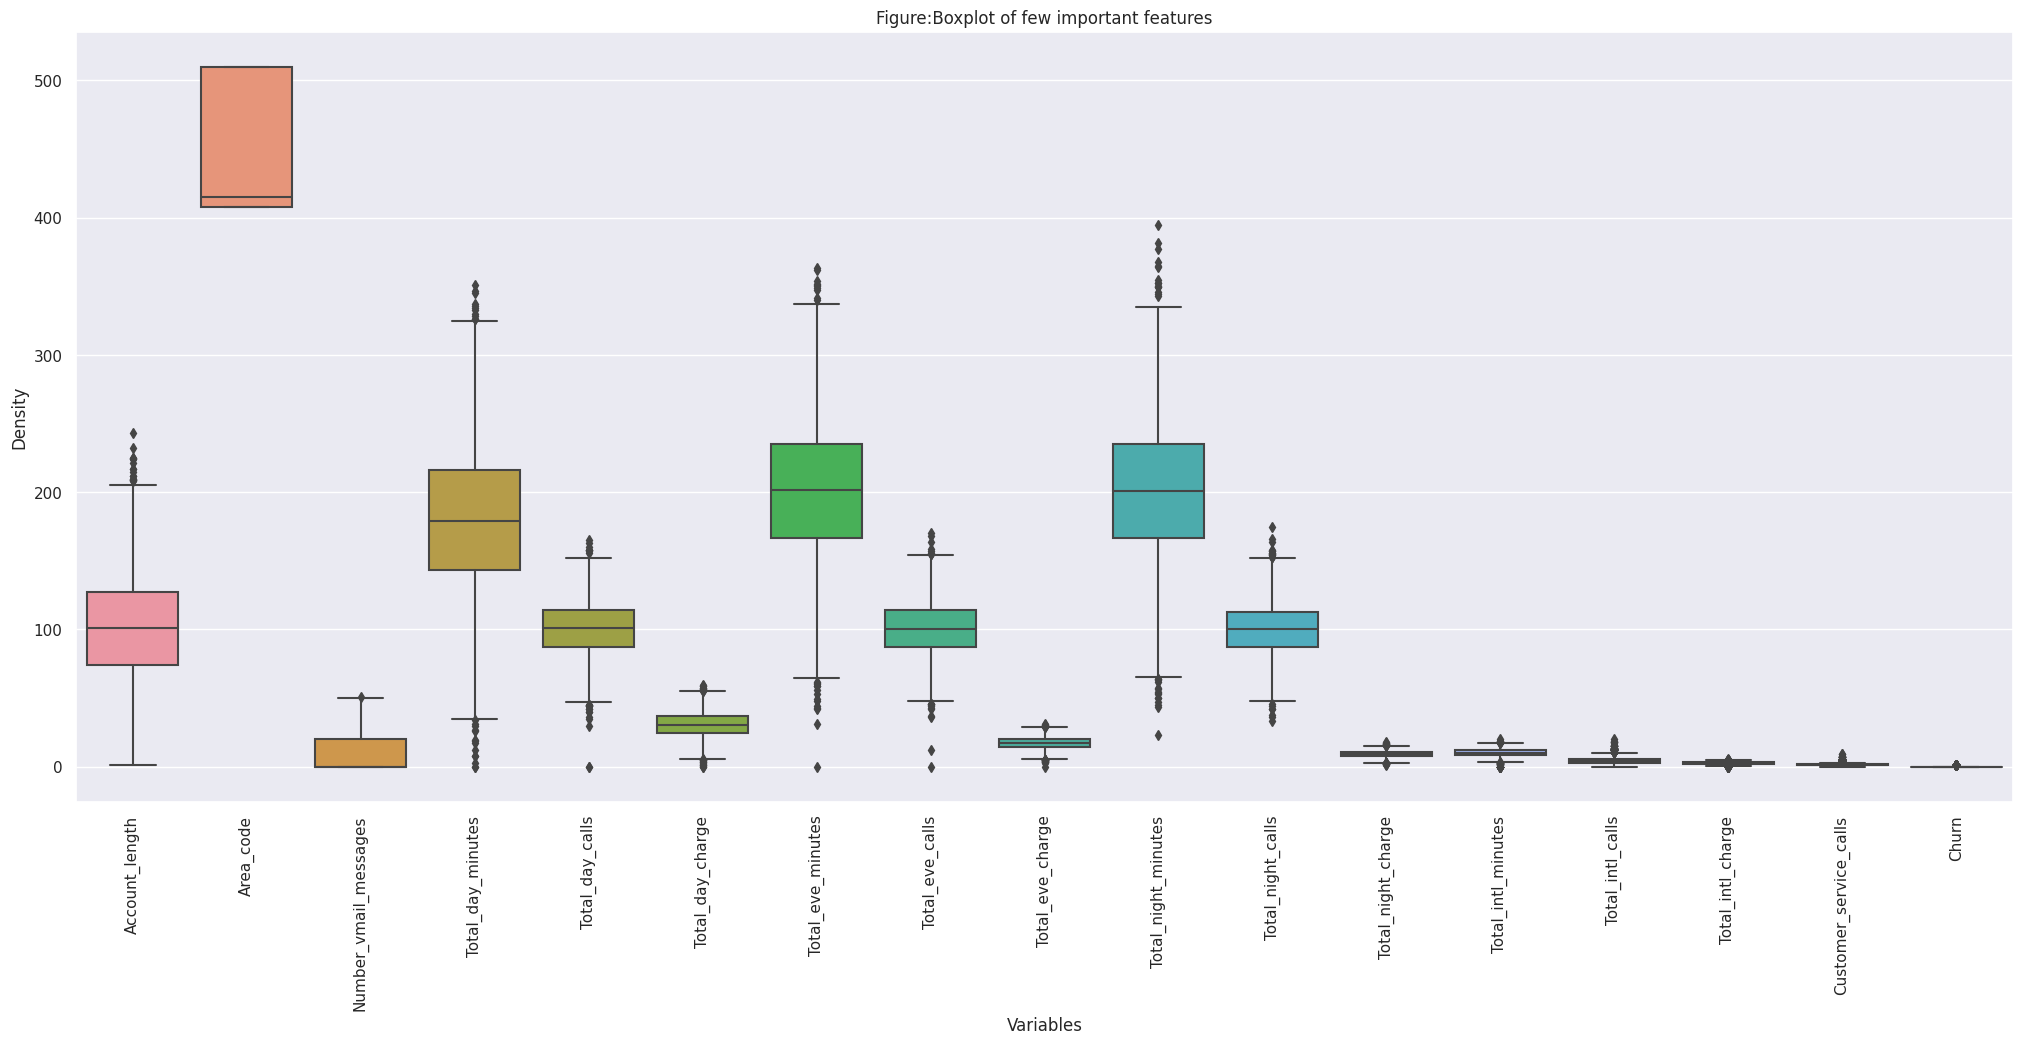

In [15]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df)
plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Density")
plt.title('Figure:Boxplot of few important features')

In [17]:
df['Churn'] = df['Churn'].astype('object')

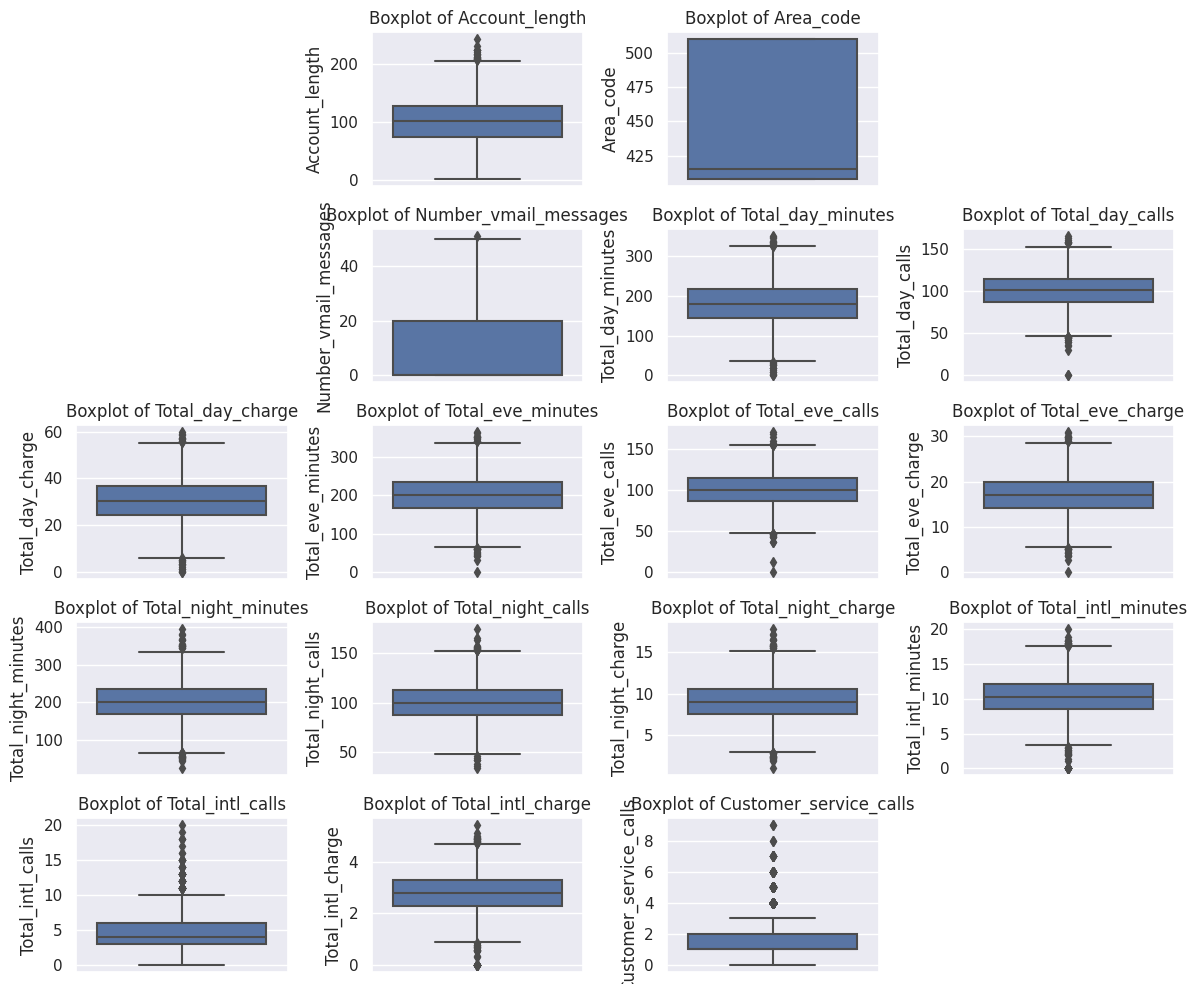

In [20]:
plt.figure(figsize = (12,10))
feature_list = df.columns
for i in range(len(feature_list)):
    if df[feature_list[i]].dtype !='object':
        plt.subplot(5, 4, i + 1)
        sns.boxplot(y = df[feature_list[i]], data = df)
        plt.title('Boxplot of {}'.format(feature_list[i]))
        plt.tight_layout()

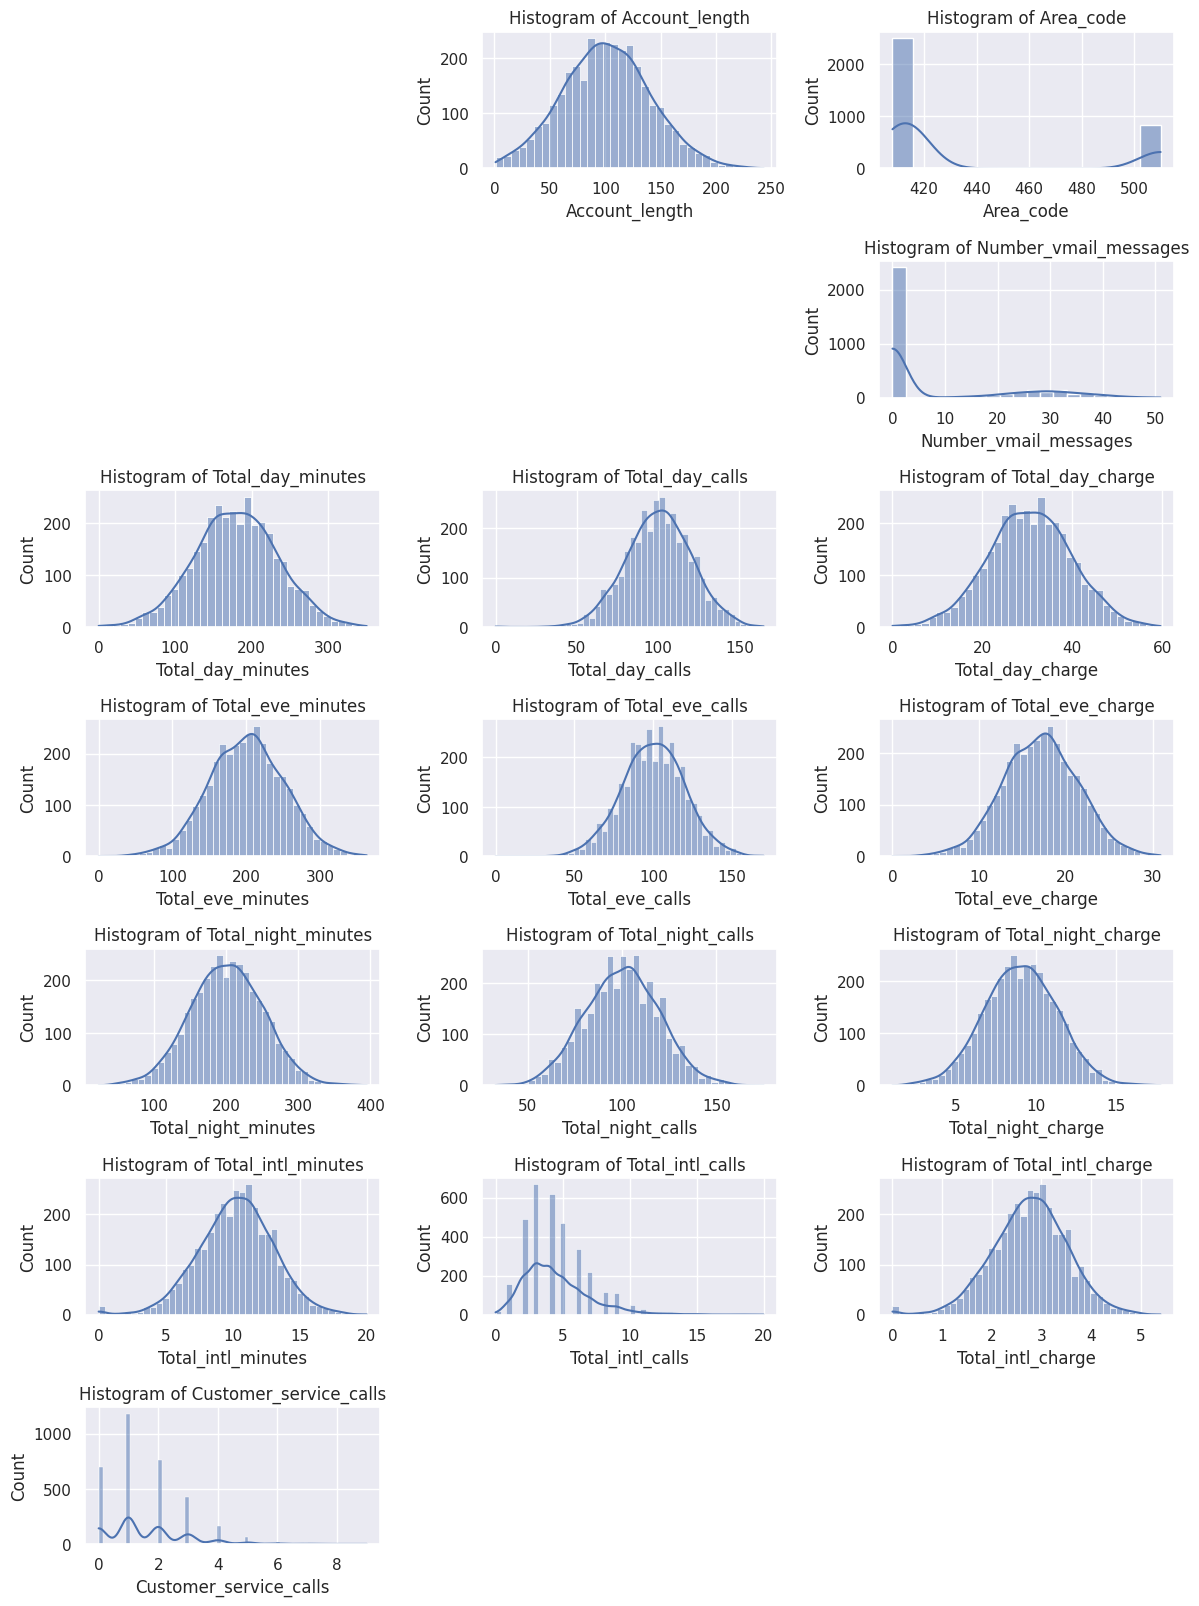

In [21]:
plt.figure(figsize = (12,18))
feature_list = df.columns
for i in range(len(feature_list)):
    if df[feature_list[i]].dtype !='object':
        plt.subplot(8, 3, i + 1)
        sns.histplot(x = df[feature_list[i]], data = df, kde = True)
        plt.title('Histogram of {}'.format(feature_list[i]))
        plt.tight_layout()